In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt

Know I want to add dataset where we do classification

In [3]:
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3.0,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5.0,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5.0,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3.0,1.4,0.1,setosa\n4.3,3.0,1.1,0.1,setosa\n5.8,4.0,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1.0,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5.0,3.0,1.6,0.2,setosa\n5.0,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.0,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3.0,1.3,0.

know check database and analyzing start

In [5]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


know check target variable values

In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

know do label encoding on species as target variable

In [9]:
import sklearn.preprocessing as pre
le = pre.LabelEncoder()
df.species = le.fit_transform(df.species)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
X = df.drop('species', axis=1)
y = df['species']

Know split data into test and train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


know apply decisiontreeclassifier using sklearn

In [15]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

know check prediction from model

In [18]:
y_pred = model.predict(X_test)
check=pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
check.head()

,Real Values,Predicted Values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


from matplotlib import pyplot as plt
_df_0['Real Values'].plot(kind='hist', bins=20, title='Real Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Values'].plot(kind='hist', bins=20, title='Predicted Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Real Values', y='Predicted Values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Real Values'].plot(kind='line', figsize=(8, 4), title='Real Values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted Values'].plot(kind='line', figsize=(8, 4), title='Predicted Values')
plt.gca().spines[['top', 'right']].set_visible(False)

know I check datset give 100% true on test prediction pon classification algorithm

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


know we visualize tree for better understanding

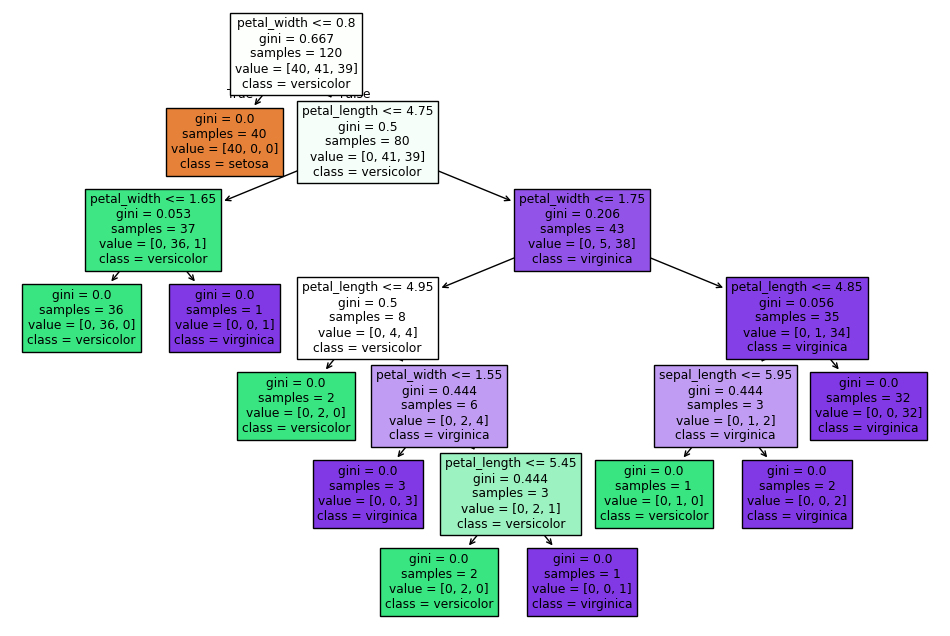

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True)
plt.show()
